# Clustering using DBSCAN

### Import libraries

In [19]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=1)

In [21]:
df = pd.DataFrame(X)

In [22]:
df.head()

,0,1
0,1.345365,-0.438468
1,1.572117,-0.320172
2,-0.518393,0.855143
3,1.404783,-0.414413
4,1.926917,0.124733


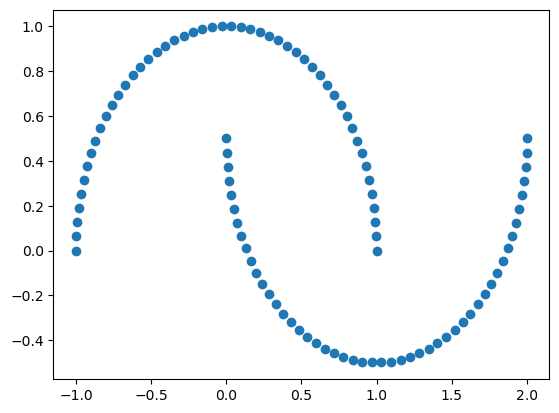

In [23]:
plt.scatter(X[:,0],X[:,1])

## Using k-means

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [25]:
labels = kmeans.labels_

In [26]:
centers = kmeans.cluster_centers_

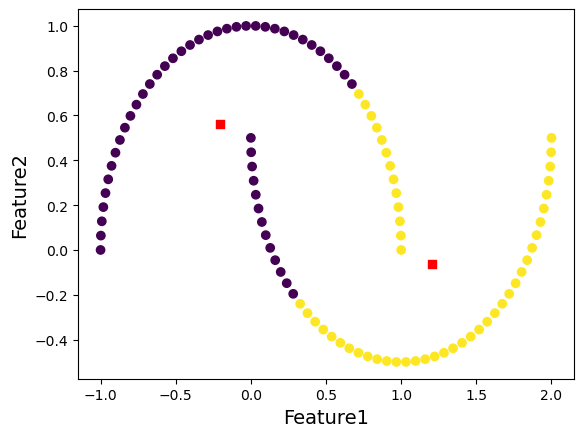

In [27]:
plt.scatter(X[:,0],X[:,1], c=labels.astype(float))
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
# draw centers 
plt.scatter(centers[:,0], centers[:,1], c="red", marker="s")
plt.show()

## Using AgglomerativeClustering 

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
model  =  AgglomerativeClustering(n_clusters=2)
model.fit(df)

AgglomerativeClustering()

In [30]:
labels = model.labels_

Text(0, 0.5, 'Feature2')

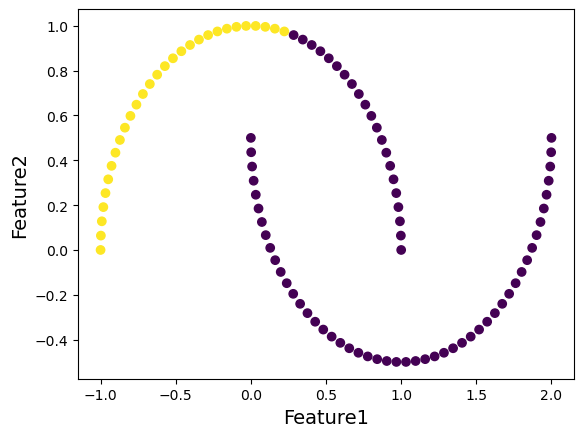

In [31]:
plt.scatter(X[:,0],X[:,1], c=labels.astype(float))
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)

## Using DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.25)

In [44]:
df['labels'] = dbscan.labels_

In [45]:
df.labels.value_counts()

0    50
1    50
Name: labels, dtype: int64

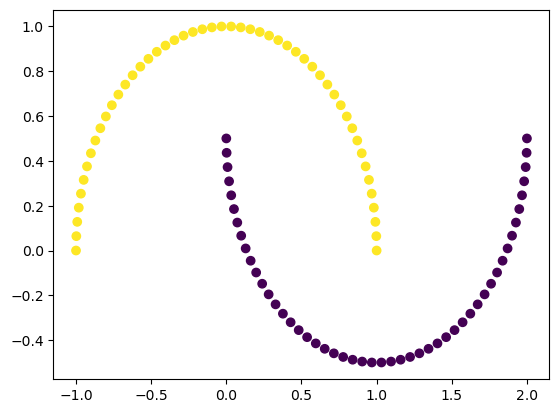

In [46]:
plt.scatter(X[:,0], X[:,1], c=df.labels.astype(float))